In [0]:
import numpy as np
import random
import pandas as pd
import time
from matplotlib import pyplot as plt
import traceback
from IPython import display
from datetime import datetime, timedelta

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def get_series(S0 = 100, mu = .05, sigma = .2, r = 0.0, T = 60, M = 60, eta = 0.95, N_MC = 2000):
  delta_t = M / T           # time interval
  gamma = np.exp(- r * delta_t)  # discount factor
  S = np.zeros(shape = (T,N_MC)) # stock price
  S[0] = S0
  RN = pd.DataFrame(np.random.randn(N_MC,T), index=range(1, N_MC+1), columns=range(1, T+1)) # standard normal random numbers
  for t in range(1, T):
    S[t] = S[t-1] * np.exp((mu - 1/2 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * RN.loc[:,t])
  return S

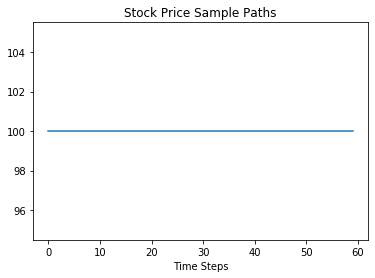

In [59]:
#Completely Flat
ts = pd.DataFrame(get_series(S0 = 100, mu = .00, sigma = .000, r = 0.0, T = 60, M = 60, eta = 0.95, N_MC = 1), columns = ['Price'])
plt.plot(ts)
plt.xlabel('Time Steps')
plt.title('Stock Price Sample Paths')
plt.show()
ts.to_csv(r"/content/drive/Shared drives/Algorithmic Trading/Test Time Series/flat.csv")


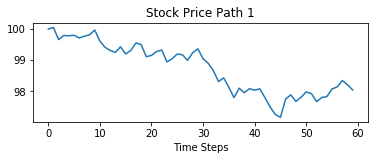

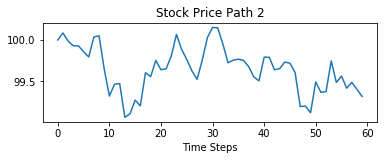

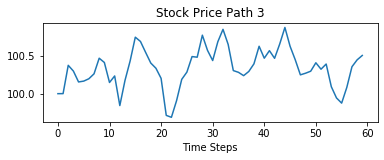

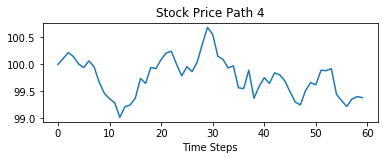

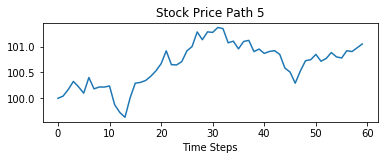

In [81]:
#Random No Drift Low vol

for i in range(5):
  ts = pd.DataFrame(get_series(S0 = 100, mu = .00, sigma = .002, r = 0.0, T = 60, M = 60, eta = 0.95, N_MC = 1), columns = ['Price'])
  plt.subplot(1 + 1, 1, 1)
  plt.plot(ts)
  plt.xlabel('Time Steps')
  plt.title('Stock Price Path %d' % (i + 1))
  plt.show()
  ts.to_csv(r"/content/drive/Shared drives/Algorithmic Trading/Test Time Series/nodr_lowvol_%d.csv" % i)


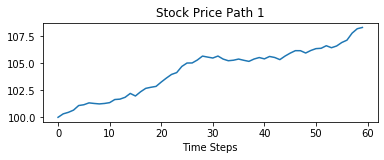

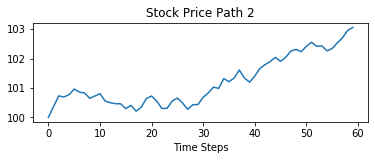

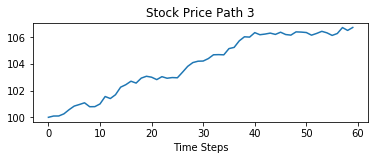

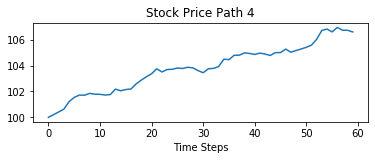

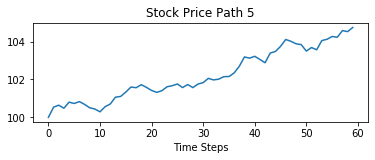

In [82]:
#Random Positive Drift Low vol

for i in range(5):
  ts = pd.DataFrame(get_series(S0 = 100, mu = .001, sigma = .002, r = 0.0, T = 60, M = 60, eta = 0.95, N_MC = 1), columns = ['Price'])
  plt.subplot(1 + 1, 1, 1)
  plt.plot(ts)
  plt.xlabel('Time Steps')
  plt.title('Stock Price Path %d' % (i + 1))
  plt.show()
  ts.to_csv(r"/content/drive/Shared drives/Algorithmic Trading/Test Time Series/posdrift_%d.csv" % i)



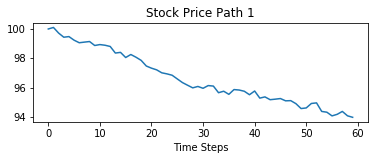

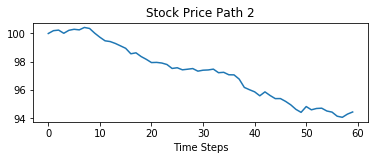

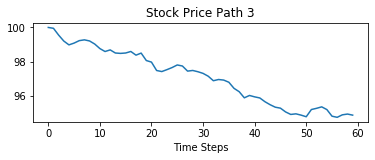

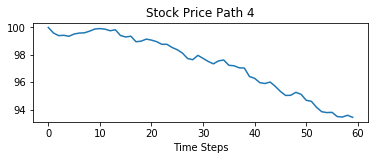

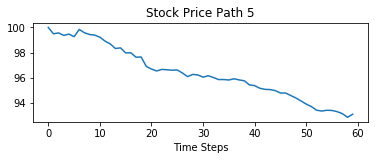

In [83]:
#Random Negative Drift Low vol

for i in range(5):
  ts = pd.DataFrame(get_series(S0 = 100, mu = -.001, sigma = .002, r = 0.0, T = 60, M = 60, eta = 0.95, N_MC = 1), columns = ['Price'])
  plt.subplot(1 + 1, 1, 1)
  plt.plot(ts)
  plt.xlabel('Time Steps')
  plt.title('Stock Price Path %d' % (i + 1))
  plt.show()
  ts.to_csv(r"/content/drive/Shared drives/Algorithmic Trading/Test Time Series/negdrift_%d.csv" % i)


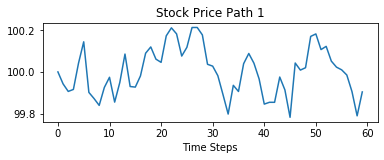

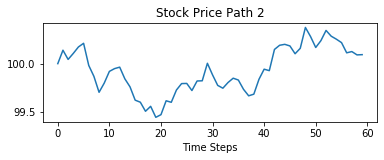

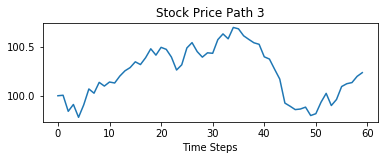

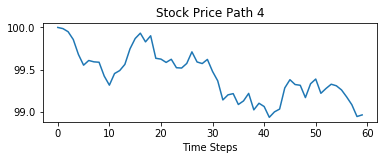

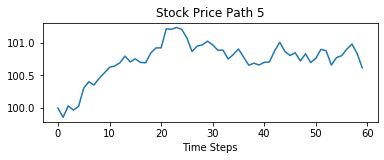

In [84]:
#Random No Drift High vol
for i in range(5):
  ts = pd.DataFrame(get_series(S0 = 100, mu = 0.0, sigma = .001, r = 0.0, T = 60, M = 60, eta = 0.95, N_MC = 1), columns = ['Price'])
  plt.subplot(1 + 1, 1, 1)
  plt.plot(ts)
  plt.xlabel('Time Steps')
  plt.title('Stock Price Path %d' % (i + 1))
  plt.show()
  ts.to_csv(r"/content/drive/Shared drives/Algorithmic Trading/Test Time Series/nodr_highvol_%d.csv" % i)


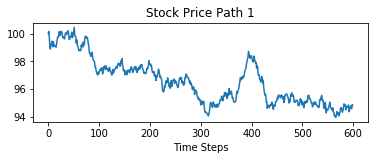

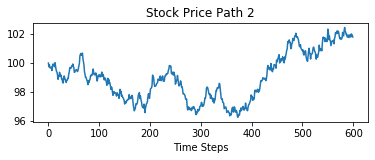

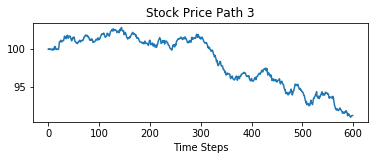

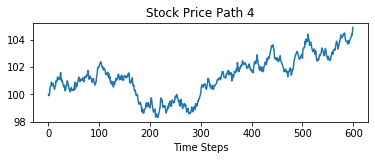

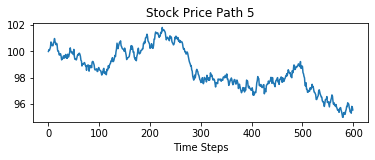

In [85]:
#Random No Drift Low vol Longer Series

for i in range(5):
  ts = pd.DataFrame(get_series(S0 = 100, mu = .00, sigma = .002, r = 0.0, T = 600, M = 600, eta = 0.95, N_MC = 1), columns = ['Price'])
  plt.subplot(1 + 1, 1, 1)
  plt.plot(ts)
  plt.xlabel('Time Steps')
  plt.title('Stock Price Path %d' % (i + 1))
  plt.show()
  ts.to_csv(r"/content/drive/Shared drives/Algorithmic Trading/Test Time Series/nodr_lowvol_long_%d.csv" % i)

